# Исследование и визуализация данных Yelp NYC

## Формируем датафреймы, строим графики

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-nyc/YelpNYC/productIdMapping
/kaggle/input/yelp-nyc/YelpNYC/metadata
/kaggle/input/yelp-nyc/YelpNYC/reviewGraph
/kaggle/input/yelp-nyc/YelpNYC/userIdMapping
/kaggle/input/yelp-nyc/YelpNYC/readmeYelp.txt
/kaggle/input/yelp-nyc/YelpNYC/reviewContent


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [3]:
PATH_TO_DATASET = '/kaggle/input/yelp-nyc/YelpNYC'
# Глобальные настройки шрифта
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
meta = pd.read_csv(PATH_TO_DATASET + '/metadata', sep='\t', )
meta.columns =  ['user_id', 'prod_id', 'rating', 'label', 'date']

reviews = pd.read_csv(PATH_TO_DATASET + '/reviewContent', sep='\t', )
reviews.columns =  ['user_id', 'prod_id', 'date', 'review']

prod_map = pd.read_csv(PATH_TO_DATASET + '/productIdMapping', sep ='\t')
prod_map.columns = ['prod_name', 'prod_id']

# user_map = pd.read_csv(PATH_TO_DATASET + '/userIdMapping', sep ='\t')
# user_map

In [5]:
meta.head()

,user_id,prod_id,rating,label,date
0,924,0,3.0,-1,2013-05-16
1,925,0,4.0,-1,2013-07-01
2,926,0,4.0,-1,2011-07-28
3,927,0,4.0,-1,2010-11-01
4,928,0,4.0,-1,2009-09-02


In [6]:
reviews.head()

,user_id,prod_id,date,review
0,924,0,2013-05-16,This little place in Soho is wonderful. I had ...
1,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
2,926,0,2011-07-28,This is a beautiful quaint little restaurant o...
3,927,0,2010-11-01,Snack is great place for a casual sit down lu...
4,928,0,2009-09-02,A solid 4 stars for this greek food spot. If ...


In [7]:
prod_map.head()

,prod_name,prod_id
0,Peppino’s,1
1,Dekalb Restaurant,3
2,Le Parisien,4
3,Blue Spoon Coffee,5
4,Nai Tapas Bar,6


In [8]:
print(f'''
length of frames:
length meta df: {len(meta)}
length reviews df: {len(reviews)}
length prod_map df: {len(prod_map)}
''')



length of frames:
length meta df: 359051
length reviews df: 358956
length prod_map df: 922



In [9]:
print(f'''
NAN values:

meta nan:
    
{meta.isna().sum()} 

reviews nan: 
    
{reviews.isna().sum()} 

prod_map nan: 
    
{prod_map.isna().sum()} 

''')


NAN values:

meta nan:
    
user_id    0
prod_id    0
rating     0
label      0
date       0
dtype: int64 

reviews nan: 
    
user_id    0
prod_id    0
date       0
review     0
dtype: int64 

prod_map nan: 
    
prod_name    0
prod_id      0
dtype: int64 




rating
1.0     14224
2.0     20775
3.0     47645
4.0    135250
5.0    141157
Name: count, dtype: int64


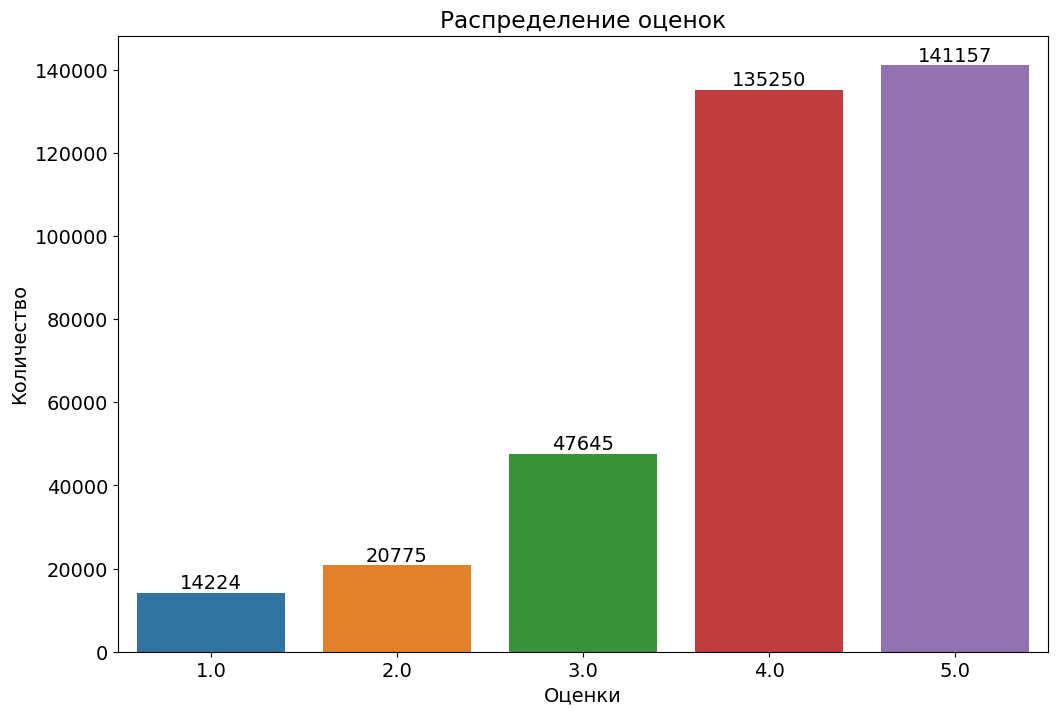

In [10]:
grades_counts = meta['rating'].value_counts().sort_index()
print(grades_counts)
plt.figure(figsize=(12,8))

ax = sns.barplot(x=grades_counts.index,y=grades_counts.values)

for p, l in zip(ax.patches, grades_counts.values):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), l, ha = 'center', va = 'bottom')
plt.title("Распределение оценок")
plt.xlabel("Оценки")
plt.ylabel("Количество")

plt.savefig("Распределение_оценок_Нью_Йорк.png")

label
Настоящий    322167
Фейк          36884
Name: count, dtype: int64


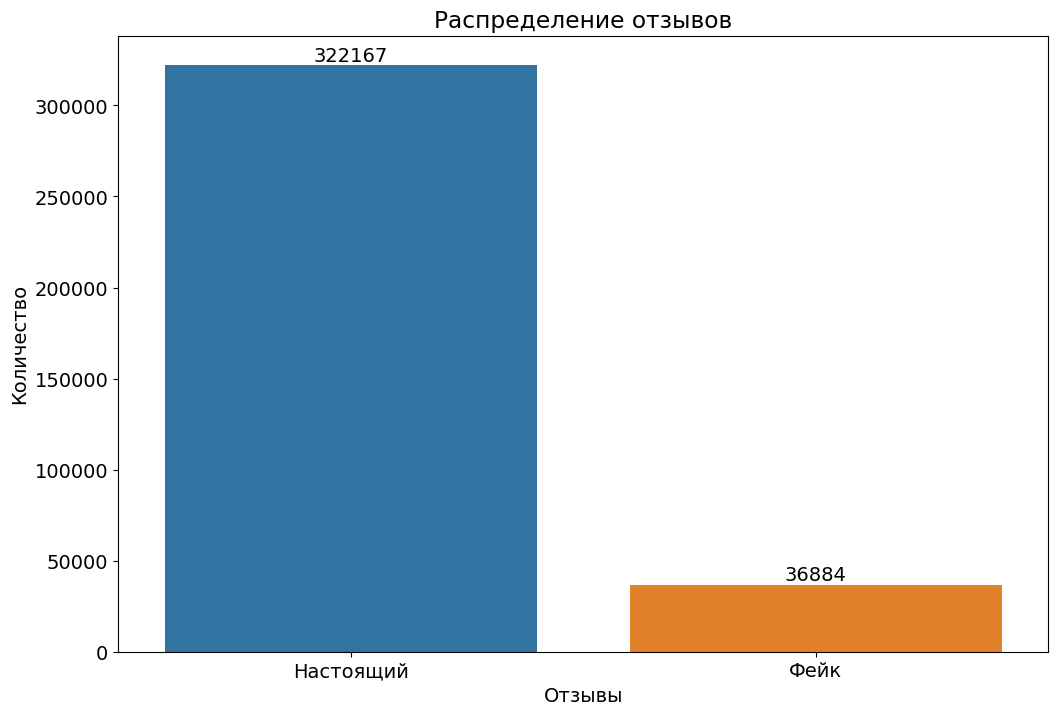

In [11]:
label_counts = meta['label'].map({-1:"Фейк", 1:"Настоящий"}).value_counts().sort_index()
print(label_counts)
plt.figure(figsize=(12,8))


ax = sns.barplot(x=label_counts.index, y=label_counts.values)
for p, l in zip(ax.patches, label_counts.values):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height()+5, l, ha='center', va='bottom') 
plt.title("Распределение отзывов")
plt.xlabel("Отзывы")
plt.ylabel("Количество")
plt.savefig('Классы_до_балансировки.png')

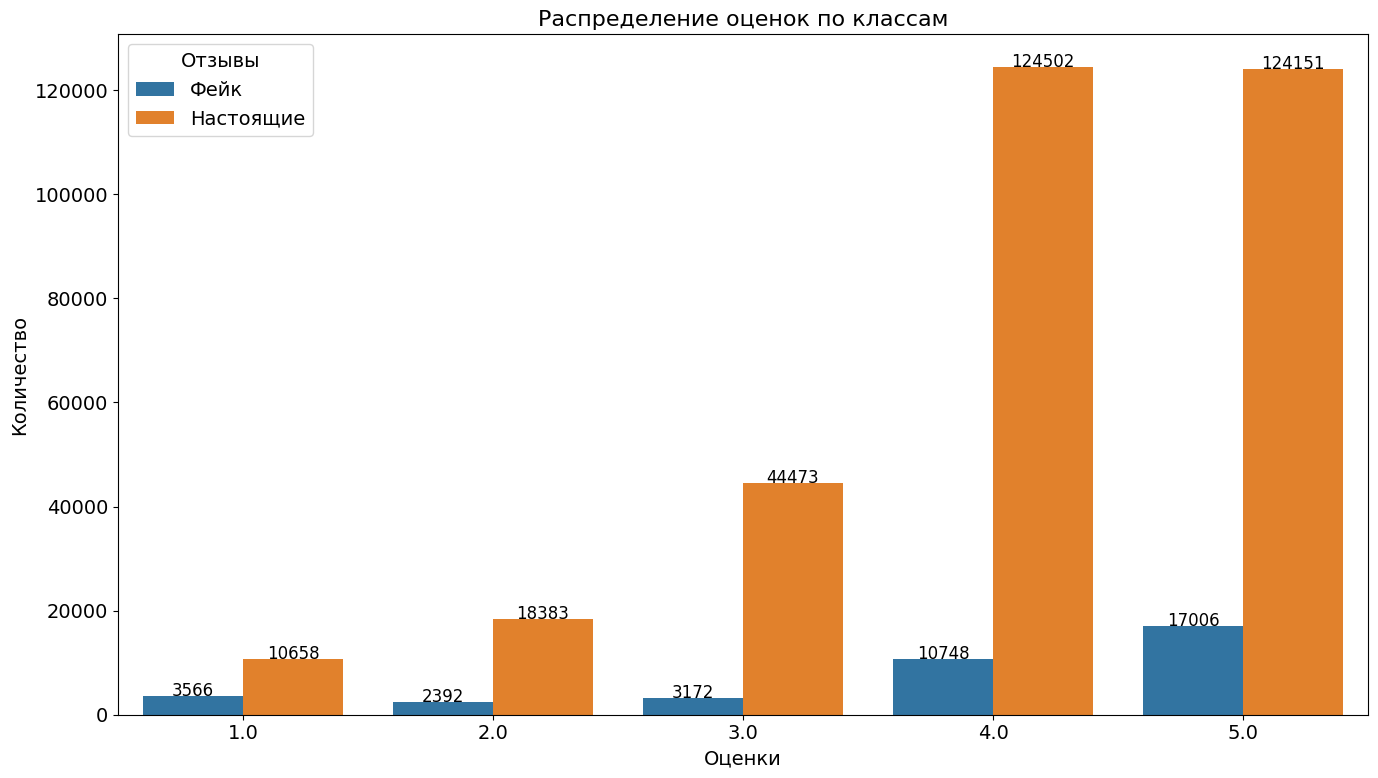

In [12]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='rating', data=meta, hue='label')

# Добавляем подписи на столбцы
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, int(height), ha='center', fontsize=12)

# Заменяем метки в легенде
legend_labels = {-1: 'Фейк', 1: 'Настоящие'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label)] for label in meta['label'].unique()], title='Отзывы')

# Настройка заголовка и подписей
plt.title("Распределение оценок по классам", fontsize=16)
plt.xlabel("Оценки", fontsize=14)
plt.ylabel("Количество", fontsize=14)

# Сохранение графика
plt.savefig("Распределение_оценок_Нью_Йорк_с_учетом_рейтинга.png")

# Отображение графика
plt.tight_layout()
plt.show()


In [13]:
# Соединим данные в единый датафрейм

reviews_and_meta_df = reviews.merge(meta, how='inner', on=['user_id', 'prod_id'])
df = reviews_and_meta_df.merge(prod_map, how='inner', on='prod_id')
df['date'] = df['date_x']
df.drop(['date_x', 'date_y'], axis=1,inplace=True)
df

,user_id,prod_id,review,rating,label,prod_name,date
0,1133,1,My wife and I took my parents there for lunch ...,1.0,-1,Peppino’s,2013-12-21
1,1134,1,Got a margarita pizza. First off let me say ve...,1.0,-1,Peppino’s,2013-11-25
2,1135,1,The food is average pizzeria and not cheap. A...,2.0,-1,Peppino’s,2014-07-24
3,1136,1,I can not fathom why people would give this re...,2.0,-1,Peppino’s,2014-03-05
4,1137,1,Went here during the time it was busy and i go...,3.0,-1,Peppino’s,2014-11-21
...,...,...,...,...,...,...,...
358742,161146,349,"I'm very spoiled with Pizza. Really, I have tr...",5.0,1,Emily,2014-02-06
358743,116424,349,Can't say enough good things about this place....,5.0,1,Emily,2014-01-31
358744,161147,349,"Had a great dinner here- fantastic pizza, the ...",5.0,1,Emily,2014-01-30
358745,97930,349,"Great foods and great drinks, they have even p...",5.0,1,Emily,2014-01-25


In [14]:
print(f'''
Количество предприятий: {len(df['prod_name'].unique())}
Количество пользователей, оставивших отзывы: {len(df['user_id'].unique())}
''')



Количество предприятий: 922
Количество пользователей, оставивших отзывы: 160163



## Облака слов

**Фейковые отзывы**

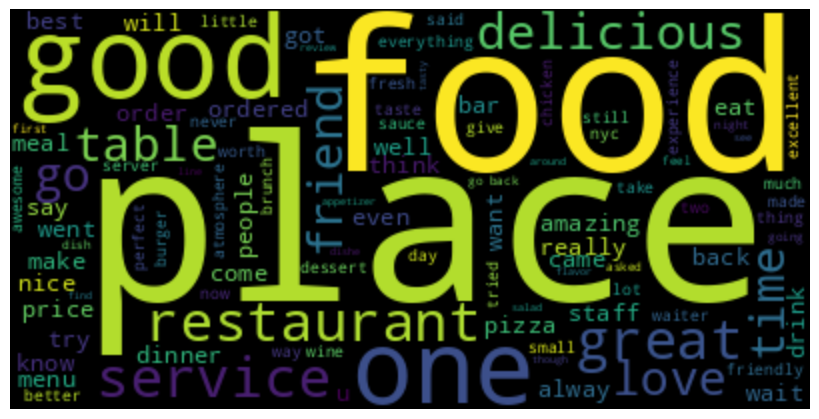

In [15]:
words = " ".join(df[df['label'] == -1]['review'].str.lower())
fake_cloud = WordCloud(stopwords=STOPWORDS, max_words=100).generate(words)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.tight_layout(pad = 0)
plt.imshow(fake_cloud,  interpolation='bilinear')
plt.savefig('облако_слов_фейк.png')

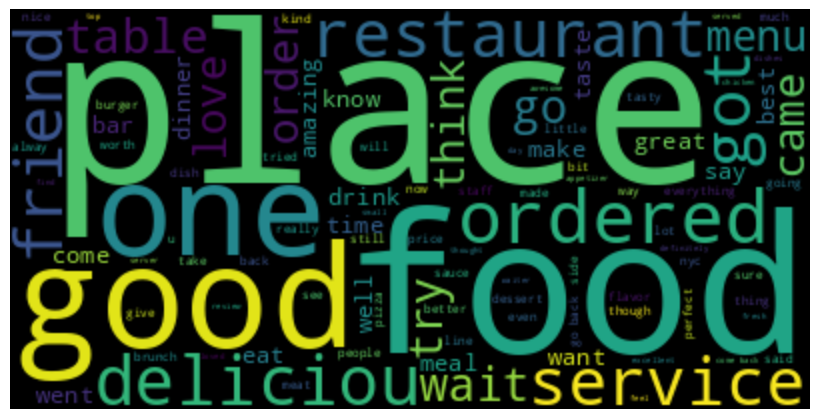

In [16]:
words = " ".join(df[df['label'] == 1]['review'].str.lower())
true_cloud = WordCloud(stopwords=STOPWORDS, max_words=100).generate(words)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.tight_layout(pad = 0)
plt.imshow(true_cloud,  interpolation='bilinear')
plt.savefig('облако_слов_настоящие.png')

**Подсчет частоты слов**

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Загрузка ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Пример текста отзывов


# Объединяем все отзывы в один текст
all_text = " ".join(df[df['label'] == -1]['review'].str.lower())

# Токенизация текста
words = word_tokenize(all_text, language='english')

# Удаление стоп-слов и пунктуации
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Подсчёт частоты слов
word_counts = Counter(filtered_words)

# Выводим топ самых частых слов
print(word_counts.most_common(30))

fake_counts = word_counts.most_common(30)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[('food', 25063), ('place', 20119), ('good', 17456), ('great', 17201), ('service', 11194), ('like', 9531), ('go', 9036), ('one', 9004), ('back', 8343), ('time', 8236), ('restaurant', 8229), ('really', 8174), ('get', 7958), ('would', 7846), ('best', 7825), ('delicious', 7081), ('us', 6560), ('love', 6415), ('wait', 6225), ('pizza', 6066), ('also', 5701), ('amazing', 5542), ('nice', 5477), ('staff', 5118), ('menu', 5050), ('even', 4807), ('try', 4761), ('well', 4606), ('always', 4491), ('table', 4486)]


In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Загрузка ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Пример текста отзывов


# Объединяем все отзывы в один текст
all_text = " ".join(df[df['label'] == 1]['review'].str.lower())

# Токенизация текста
words = word_tokenize(all_text, language='english')

# Удаление стоп-слов и пунктуации
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Подсчёт частоты слов
word_counts = Counter(filtered_words)

# Выводим 30 самых частых слов
print(word_counts.most_common(30))

true_counts = word_counts.most_common(30)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[('good', 221961), ('food', 218257), ('place', 206007), ('great', 154089), ('like', 132068), ('really', 114311), ('one', 114071), ('get', 105873), ('would', 101048), ('back', 95745), ('service', 95696), ('go', 93779), ('time', 92284), ('delicious', 89179), ('also', 87783), ('wait', 75979), ('best', 73636), ('restaurant', 72854), ('ordered', 71537), ('got', 70336), ('chicken', 68437), ('us', 67087), ('menu', 65615), ('little', 64766), ('sauce', 64682), ('nice', 64646), ('well', 63499), ('definitely', 63037), ('came', 62904), ('try', 62651)]


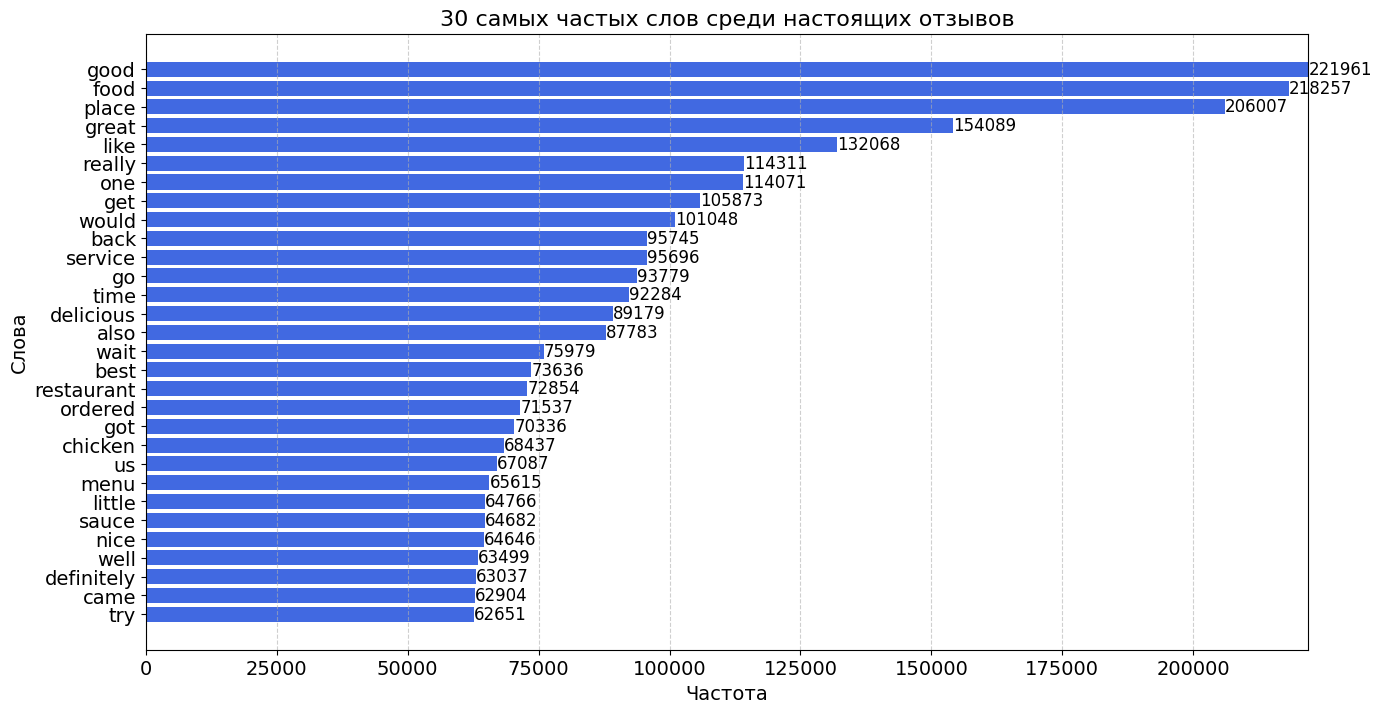

In [19]:
words, counts = zip(*true_counts)
plt.figure(figsize=(15, 8))
bars = plt.barh(words, counts, color='royalblue')

# Добавление подписей с количеством
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
             va='center', fontsize=12)

# Настройки графика
plt.xlabel("Частота", fontsize=14)
plt.ylabel("Слова", fontsize=14)
plt.title("30 самых частых слов среди настоящих отзывов", fontsize=16)
plt.gca().invert_yaxis()  # Инверсия оси Y для сортировки сверху вниз
plt.xlim(0, max(counts) + 1)  # Добавляем небольшой запас на оси X
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Горизонтальные линии сетки
plt.savefig('топ_30_слов_настоящие.png')
# Отображение графика
plt.show()

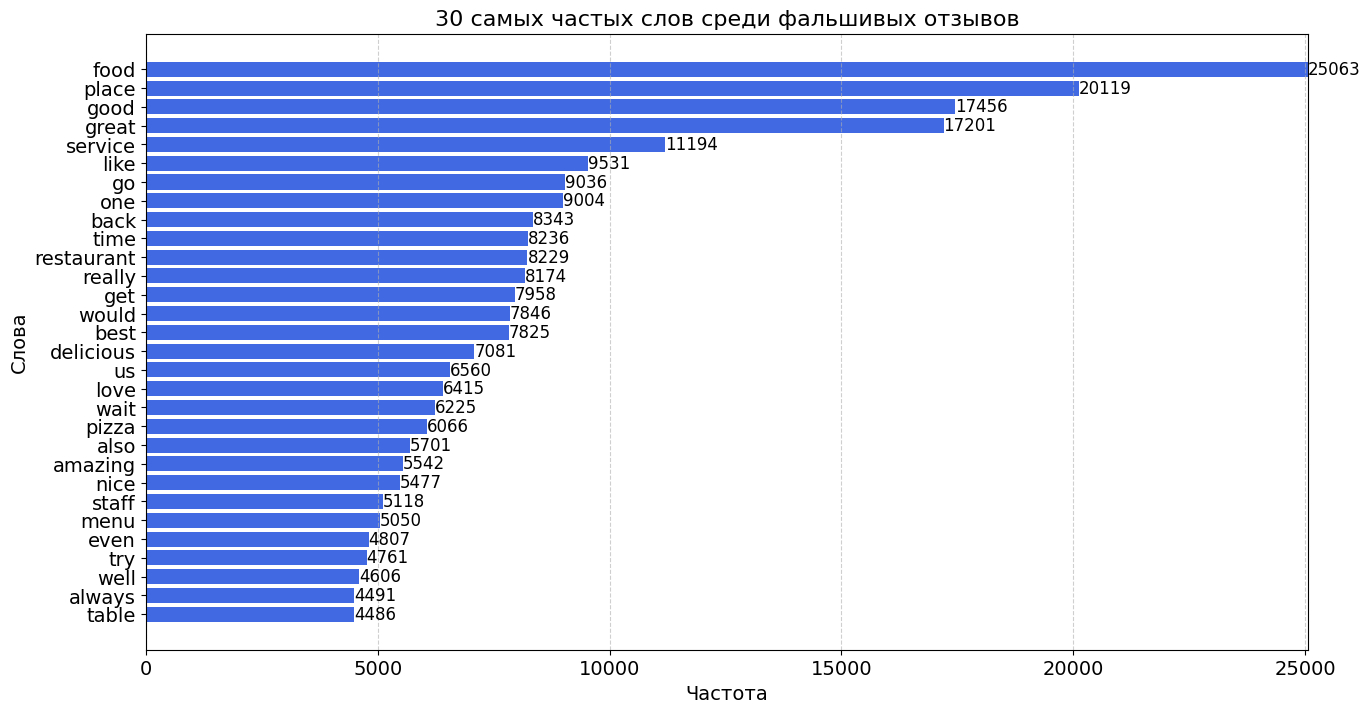

In [20]:
words, counts = zip(*fake_counts)
plt.figure(figsize=(15, 8))
bars = plt.barh(words, counts, color='royalblue')

# Добавление подписей с количеством
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
             va='center', fontsize=12)

# Настройки графика
plt.xlabel("Частота", fontsize=14)
plt.ylabel("Слова", fontsize=14)
plt.title("30 самых частых слов среди фальшивых отзывов", fontsize=16)
plt.gca().invert_yaxis()  # Инверсия оси Y для сортировки сверху вниз
plt.xlim(0, max(counts) + 1)  # Добавляем небольшой запас на оси X
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Горизонтальные линии сетки
plt.savefig('топ_30_слов_фальшивые.png')
# Отображение графика
plt.show()

In [21]:
set_f = set([item[0] for item in fake_counts])
set_t = set([item[0] for item in true_counts])

intersect_sets = {item for item in set_f if item in set_t}

print(f'''
Пересечение множеств:{intersect_sets}, 
Длина: {len(intersect_sets)}
''')

non_intersect_f = {item for item in set_f if item not in set_t}

print(f'''
Слова из топа фальшивых, которые не включены в топ настоящих: {non_intersect_f}, 
Длина: {len(non_intersect_f)}
''')


non_intersect_t = {item for item in set_t if item not in set_f}
print(f'''
Слова из топа настоящих, которые не включены в топ фальшивых {non_intersect_t}, 
Длина: {len(non_intersect_t)}

''')


Пересечение множеств:{'one', 'best', 'like', 'back', 'go', 'try', 'time', 'really', 'delicious', 'well', 'place', 'wait', 'us', 'service', 'great', 'nice', 'also', 'food', 'would', 'good', 'get', 'restaurant', 'menu'}, 
Длина: 23


Слова из топа фальшивых, которые не включены в топ настоящих: {'pizza', 'table', 'even', 'love', 'amazing', 'staff', 'always'}, 
Длина: 7


Слова из топа настоящих, которые не включены в топ фальшивых {'definitely', 'chicken', 'sauce', 'ordered', 'little', 'got', 'came'}, 
Длина: 7




## Матрица корреляции признаков

In [22]:
df

,user_id,prod_id,review,rating,label,prod_name,date
0,1133,1,My wife and I took my parents there for lunch ...,1.0,-1,Peppino’s,2013-12-21
1,1134,1,Got a margarita pizza. First off let me say ve...,1.0,-1,Peppino’s,2013-11-25
2,1135,1,The food is average pizzeria and not cheap. A...,2.0,-1,Peppino’s,2014-07-24
3,1136,1,I can not fathom why people would give this re...,2.0,-1,Peppino’s,2014-03-05
4,1137,1,Went here during the time it was busy and i go...,3.0,-1,Peppino’s,2014-11-21
...,...,...,...,...,...,...,...
358742,161146,349,"I'm very spoiled with Pizza. Really, I have tr...",5.0,1,Emily,2014-02-06
358743,116424,349,Can't say enough good things about this place....,5.0,1,Emily,2014-01-31
358744,161147,349,"Had a great dinner here- fantastic pizza, the ...",5.0,1,Emily,2014-01-30
358745,97930,349,"Great foods and great drinks, they have even p...",5.0,1,Emily,2014-01-25


          user_id   prod_id    rating     label
user_id  1.000000  0.345226  0.028026 -0.186337
prod_id  0.345226  1.000000 -0.016579 -0.005519
rating   0.028026 -0.016579  1.000000  0.022618
label   -0.186337 -0.005519  0.022618  1.000000


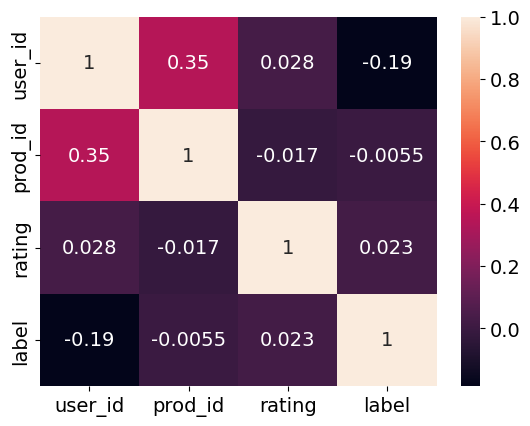

In [23]:
df2 = df.drop(['prod_name', 'date', 'review'], axis=1)
corr = df2.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.savefig('корреляция_метаданных.png')

In [24]:
# Количество отзывов на отдельные предприятия
count_reviews_each_prod = df['prod_id'].value_counts().sort_index()
# print(count_reviews_each_prod)
df_temp = pd.DataFrame({"prod_id" : count_reviews_each_prod.index, 
                        "count":  count_reviews_each_prod.values})
df_temp = df_temp.merge(prod_map, how='inner', on='prod_id')
df_temp

,prod_id,count,prod_name
0,1,253,Peppino’s
1,2,166,Potatopia
2,3,59,Dekalb Restaurant
3,4,547,Le Parisien
4,5,86,Blue Spoon Coffee
...,...,...,...
917,918,389,Jeepney
918,919,486,Bistango
919,920,306,BrisketTown
920,921,192,Bijan’s


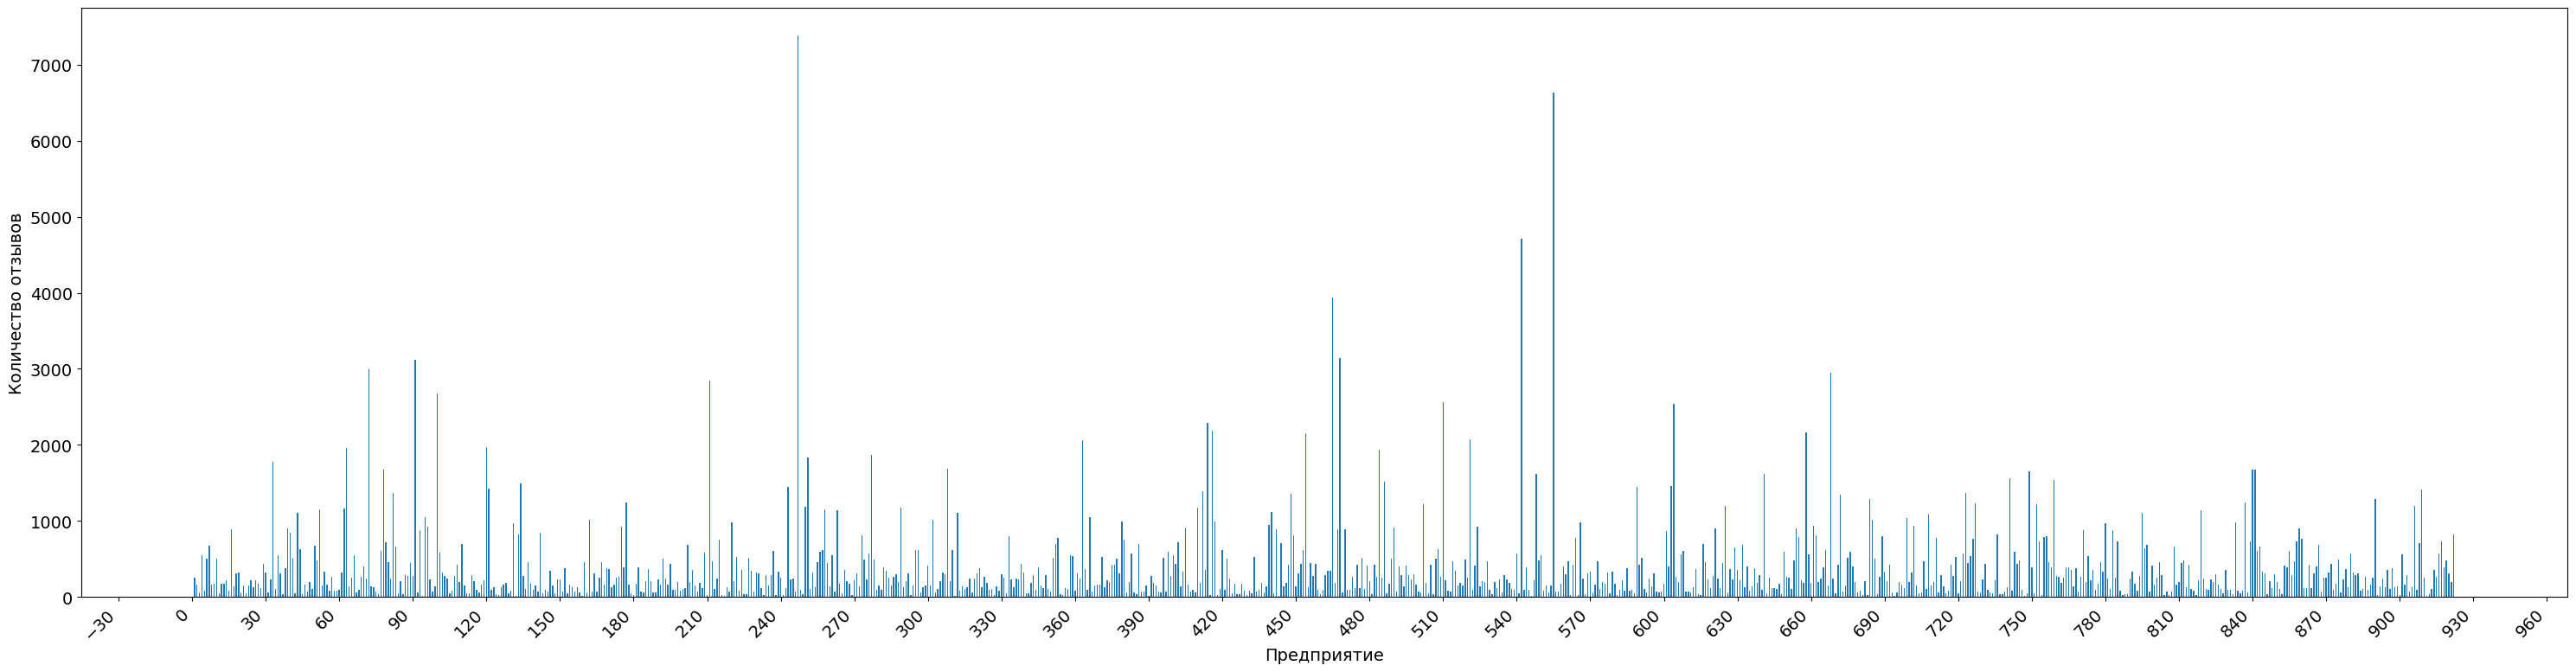

In [25]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(30, 8))
plt.bar(df_temp['prod_id'], df_temp['count'], width=0.5)
plt.xlabel('Предприятие')
plt.ylabel('Количество отзывов')

# Автоматический выбор меток
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=40))  # Ограничиваем количество меток

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
df.to_csv('yelp_nyc.csv')